## 1. Predicting house price with size

### Prepare data 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

In [2]:
def wrangle(filepath):
    df = pd.read_excel(filepath)

    # Subset to houses 
    mask_house = df["property_type"] == "house"

    df = df[mask_house]

    # Drop n/a values 
    df.dropna(subset=["price_aprox_usd", "surface_covered_in_m2"], inplace = True)

    # Remove outliers by "surface_covered_in_m2"
    low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
    mask_area = df["surface_covered_in_m2"].between(low, high)
    df = df[mask_area]

    return df 

In [3]:
df = wrangle("data/real-estate-1.xlsx")
print(df.shape)
df.head()

(1872, 15)


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
1,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,NaN,250000.0,USD,3790600.0,250000.0,117.0,120.0,2136.752137,2083.333333,NaN,4.0,NaN
2,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Cast...,"-34.6497002,-58.658073",410000.0,USD,6216584.0,410000.0,410.0,220.0,1000.000000,1863.636364,NaN,NaN,NaN
3,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Tres de Fe...,"-34.5957086,-58.5669503",180000.0,USD,2729232.0,180000.0,200.0,135.0,900.000000,1333.333333,NaN,5.0,NaN
7,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|Ituzaingó|,"-34.6552091,-58.69732",130000.0,USD,1971112.0,130000.0,300.0,140.0,433.333333,928.571429,NaN,NaN,NaN
12,sell,house,|Argentina|Bs.As. G.B.A. Zona Oeste|La Matanza...,"-34.6521726,-58.5778671",230000.0,USD,3487352.0,230000.0,290.0,230.0,793.103448,1000.000000,NaN,5.0,NaN


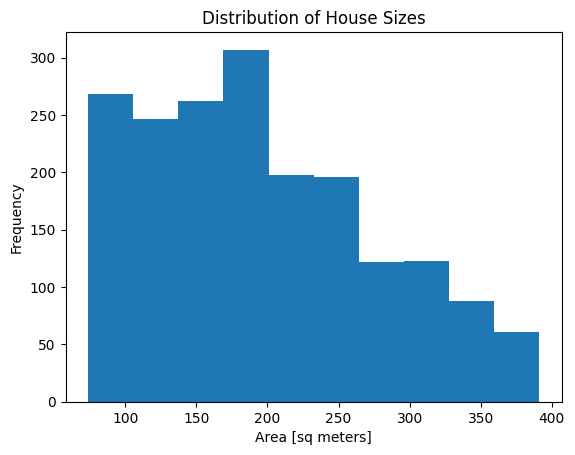

In [4]:
# Histogram of "surface_covered_in_m2"
plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Frequency")
plt.title("Distribution of House Sizes");

plt.savefig("images/fig2.1_hist.png", format='png')

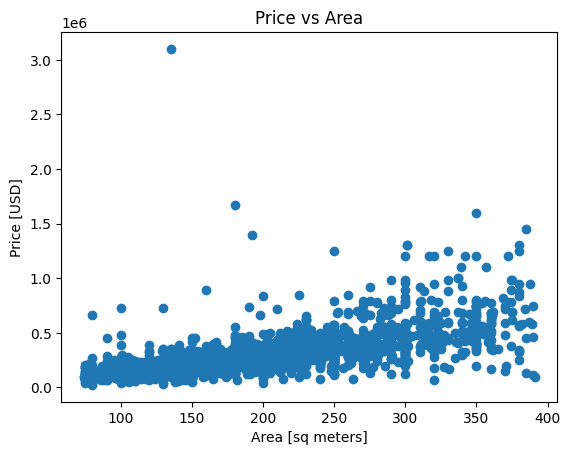

In [5]:
# Scatter plot
plt.scatter(x = df["surface_covered_in_m2"], y = df["price_aprox_usd"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Price vs Area");

plt.savefig("images/fig2.2_scatter_plot.png", format='png')

In [6]:
# Correlation
cor = df["surface_covered_in_m2"].corr(df["price_aprox_usd"])
print(f"The correlation between 'surface_covered_in_m2 and 'price_aprox_usd' is: {round(cor,4)}")

The correlation between 'surface_covered_in_m2 and 'price_aprox_usd' is: 0.6511


In [7]:
# Split the data for training 
features = ["surface_covered_in_m2"]
X_train = df[features]
X_train.shape

(1872, 1)

In [8]:
# Target vector 
target = "price_aprox_usd"
y_train = df[target]
y_train.shape

(1872,)

### Build Model

In [9]:
# Baseline 
y_mean = y_train.mean()
y_mean

np.float64(304824.4887820513)

In [10]:
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[np.float64(304824.4887820513),
 np.float64(304824.4887820513),
 np.float64(304824.4887820513),
 np.float64(304824.4887820513),
 np.float64(304824.4887820513)]

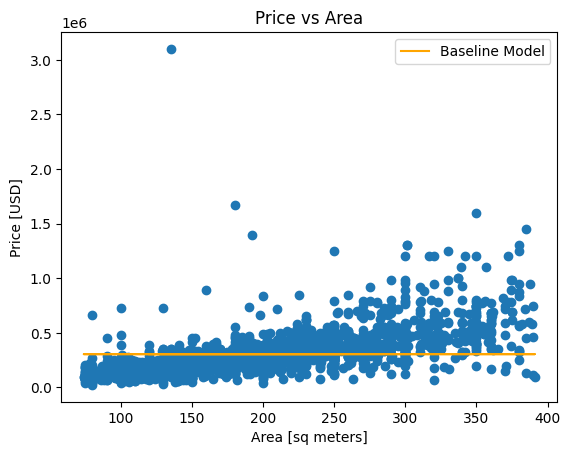

In [11]:
# Notice "X_train" is a df -> convert to a list of values 
plt.plot(X_train.values, y_pred_baseline, color = "orange", label = "Baseline Model")

plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Price vs Area")
plt.legend();

plt.savefig("images/fig2.3_baseline_plot.png", format='png')

In [12]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print(f"Mean house price is {round(y_mean, 2)}")
print(f"Baseline MAE: {round(mae_baseline, 2)}")

Mean house price is 304824.49
Baseline MAE: 143357.58


In [13]:
# Iterate 
# Instantiate a LinearRegression model 
model = LinearRegression()

In [14]:
# Fit model to the data 
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# Evaluate 
# Create a list of predictions for the observations in the feature matrix X_train
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([174017.50081302, 343688.36054794, 199468.12977325, 207951.67276   ,
       360655.44652143])

In [16]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print(f"Training MAE: {round(mae_training, 2)}")

Training MAE: 92515.77


### Communicate results

In [17]:
# Find the model's intercept 
intercept = model.intercept_
print("Model Intercept:", round(intercept, 2))
type(intercept)

Model Intercept: -29587.53


numpy.float64

In [18]:
coefficient = model.coef_[0]
print("Model coefficient for 'surface_covered_in_m2':", round(coefficient, 2))
type(coefficient)

Model coefficient for 'surface_covered_in_m2': 1696.71


numpy.float64

In [19]:
print(f"house_price = {round(intercept,2)} + {round(coefficient,2)} * surface_covered")

house_price = -29587.53 + 1696.71 * surface_covered


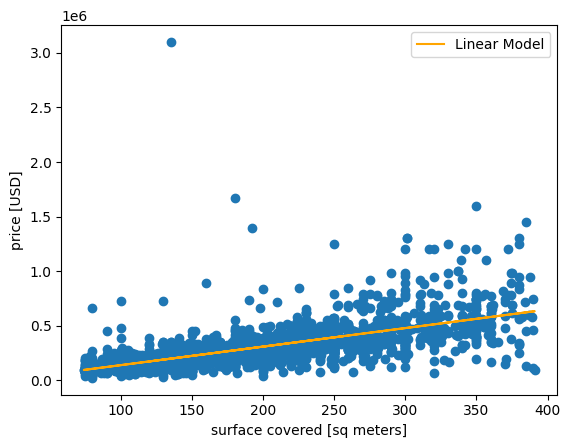

In [20]:
# plot the model
plt.plot(X_train, model.predict(X_train), color = "orange", label = "Linear Model")

plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [USD]")
plt.legend();

plt.savefig("images/fig2.4_model_plot.png", format='png')